## Tips Dataset 

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= 'https://pandas.pydata.org/_static/pandas_logo.png')

#### Python Data Analysis Library
https://pandas.pydata.org/

The pandas website.

#### Visualizing the distribution of a dataset
https://seaborn.pydata.org/tutorial/distributions.html#plotting-bivariate-distributions

The seaborn website.

### About the dataset

A waiter in one restaurant recorded information about each tip he received over a period of a few months. He collected several variables:
- the total bill in USD
- tip in USD
- sex of the bill payer
- whether there were smokers in the party
- day of the week
- time of day
- size of the party.

In all he recorded 244 tips. 
The data set is pulled from:
Bryant, P. G. and Smith, M (1995) *Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing*

### Loading data

## Link to tips dataset: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv

In [4]:
#Import Pandas (Data Structure Library which structure data in columns and rows)
import pandas as pd

# Import numerical library 'Numpy' to perform mathemtical operations 
import numpy as np

# Import metplotlib library to buil plots
import matplotlib.pyplot as plt

#Import Statistical plotting library 'Seaborn' to create more advanced plot visualizations
import seaborn as sns

In [10]:
# Load the Tips dataset from the link and check the column headers
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# Check the number of rows in the dataset
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The data contains both numbers (total bill, tips, size) and the strings (sex, smoker, day, time). There are 244 rercords in the dataset

In [12]:
# Check the mean, standard deviation, min and max amount and the distribution in the intervals of 25%, 50%, 75%

df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Total bill and tip analysis

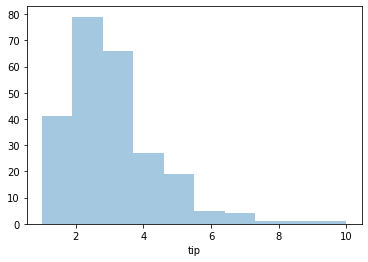

In [13]:
# Show the tip and total bill distribution

sns.distplot(df['tip'], kde=False, bins=10);

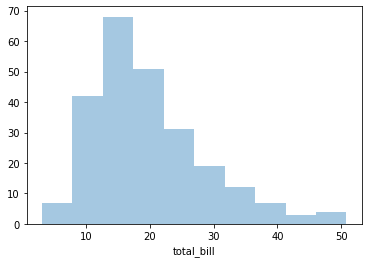

In [14]:
sns.distplot(df['total_bill'], kde=False, bins=10);

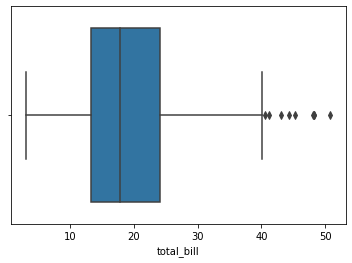

In [17]:
sns.boxplot(x="total_bill", data=df)

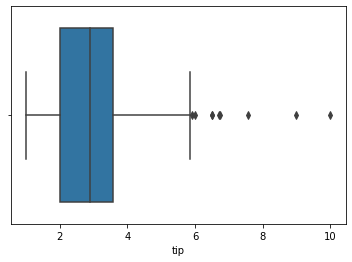

In [18]:
sns.boxplot(x="tip", data=df)

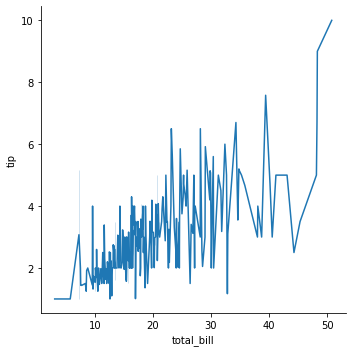

In [19]:
sns.relplot(x="total_bill", y="tip", kind="line", data=df)

Scatterplot analysis

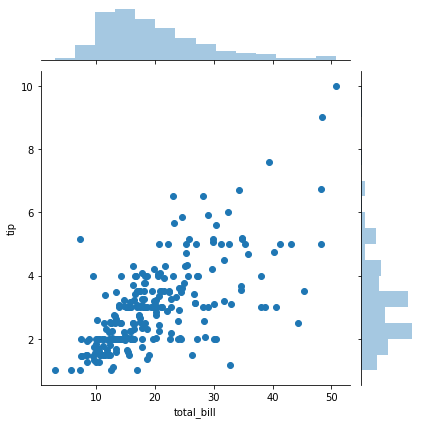

In [20]:
sns.jointplot(x="total_bill", y="tip", data=df)

The tip amount does not depend on the total bill amount. 

Kernel density estimation analysis

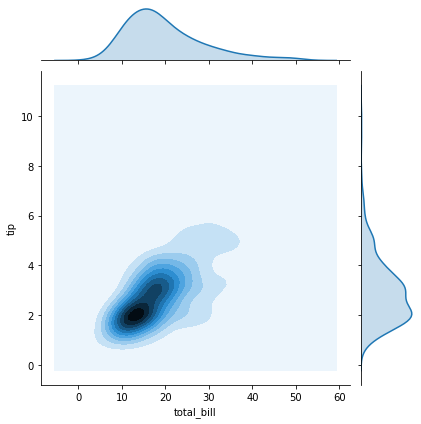

In [86]:
sns.jointplot(x="total_bill", y="tip", data=df, kind="kde")

### Analysis of relationships between other variables  

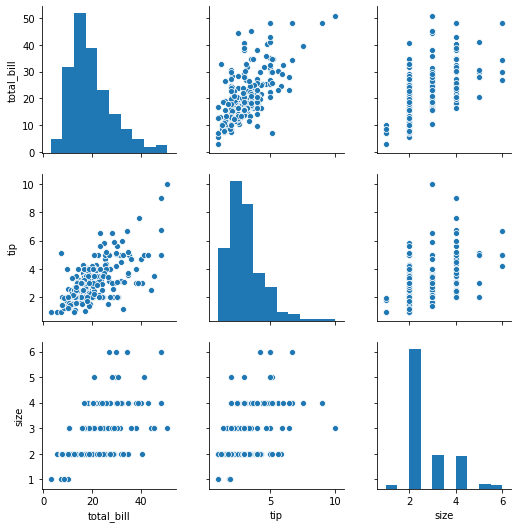

In [52]:
# Show the relationships between different varibles using pairplot function

x = sns.pairplot(df)

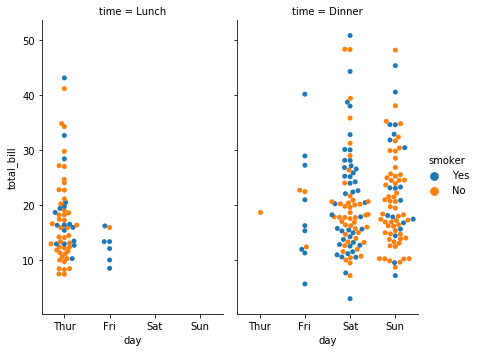

In [47]:
# Show multiple relationships with catplot

sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=df);

On Thursday the most popular meal is lunch, with the majority of guests non-smokers and the cost of most bills between 10 and 20 USD. 
On Saturday there are only dinners served, with a dominant groups being smokers. The majority of bills are in the range from 10 to 30 USD. 
Sunday's meal is again dinner, this time the guests are predominantly non-smokers (possibly more families coming over for lunch). 

In [3]:
sns.catplot(x="day", y="total_bill", hue="sex",
            col="time", aspect=.6,
            kind="swarm", data=df);

NameError: name 'sns' is not defined

In [1]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=df);

NameError: name 'sns' is not defined

Total bill and tips by women

In [83]:
(df.loc[df.loc[:, 'sex'] == 'Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


Total bill and tips by men

In [84]:
(df.loc[df.loc[:, 'sex'] == 'Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


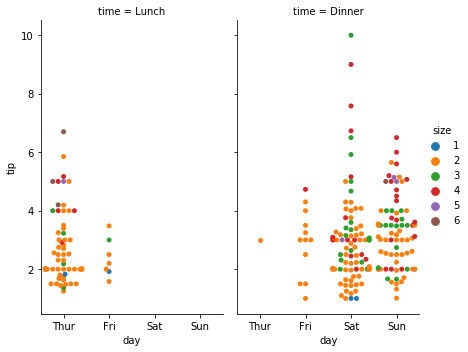

In [51]:
# Check if there is relationship between the tip and the group size on particular day

sns.catplot(x="day", y="tip", hue="size",
            col="time", aspect=.6,
            kind="swarm", data=df);

In [ ]:
The individual guests have tendency to leave low tips (below 2USD). 
2-people groups are the most common starting from Thursday to Sunday inclusive.

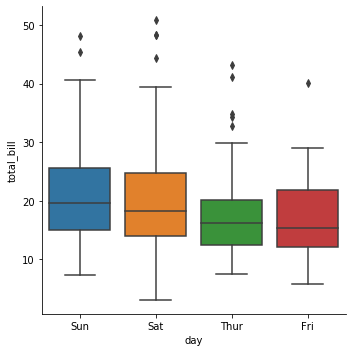

In [23]:
# Analyze if the day has impact on the total bill or the tip

sns.catplot(x="day", y="total_bill", kind="box", data=df)

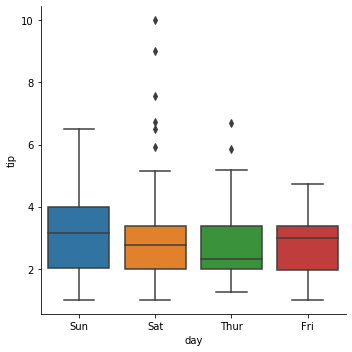

In [24]:
sns.catplot(x="day", y="tip", kind="box", data=df)

Thursday is the day where the total bill cost is the lowest but as we progress to the weekend, the bill cost increase. A few outliers can be notices on each day.

This is not reflected in the tips the same way. Tips remain at similar level from Thursday to Saturday with the Median shifting.
The noticable increse in the tips is recorded on Sunday.
The outliers are only visible on Saturday and Thursday.

In [ ]:
sns.catplot(x="tip", y="", hue="size",
            col="time", aspect=.6,
            kind="swarm", data=df);

In [10]:
# Check the index
df.sort_values(by='tip')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
75,10.51,1.25,Male,No,Sat,Dinner,2
135,8.51,1.25,Female,No,Thur,Lunch,2


In [39]:
df.loc[:, 'tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
5      4.71
6      2.00
7      3.12
8      1.96
9      3.23
10     1.71
11     5.00
12     1.57
13     3.00
14     3.02
15     3.92
16     1.67
17     3.71
18     3.50
19     3.35
20     4.08
21     2.75
22     2.23
23     7.58
24     3.18
25     2.34
26     2.00
27     2.00
28     4.30
29     3.00
       ... 
214    6.50
215    1.10
216    3.00
217    1.50
218    1.44
219    3.09
220    2.20
221    3.48
222    1.92
223    3.00
224    1.58
225    2.50
226    2.00
227    3.00
228    2.72
229    2.88
230    2.00
231    3.00
232    3.39
233    1.47
234    3.00
235    1.25
236    1.00
237    1.17
238    4.67
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [11]:
# Set total bill and tip as index (together they are unique values)
df.set_index(['total_bill', 'tip'], inplace=True)
df

,,sex,smoker,day,time,size
total_bill,tip,,,,,
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2.00,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2


In [15]:
# Show as true values all the female customers and as False all the male customers
df.loc[:, 'sex'] == 'Female'

total_bill  tip  
3.07        1.00      True
5.75        1.00      True
7.25        1.00      True
            5.15     False
7.51        2.00     False
7.56        1.44     False
7.74        1.44     False
8.35        1.50      True
8.51        1.25      True
8.52        1.48     False
8.58        1.92     False
8.77        2.00     False
9.55        1.45     False
9.60        4.00      True
9.68        1.32     False
9.78        1.73     False
9.94        1.56     False
10.07       1.25     False
            1.83      True
10.09       2.00      True
10.27       1.71     False
10.29       2.60      True
10.33       1.67      True
            2.00      True
10.34       1.66     False
            2.00     False
10.51       1.25     False
10.59       1.61      True
10.63       2.00      True
10.65       1.50      True
                     ...  
30.40       5.60     False
30.46       2.00     False
31.27       5.00     False
31.71       4.50     False
31.85       3.18     False
32.40     

In [18]:
# Show from the dataframe all the males. 
df.loc[df.loc[:, 'sex'] == 'Male']

,,sex,smoker,day,time,size
total_bill,tip,,,,,
7.25,5.15,Male,Yes,Sun,Dinner,2
7.51,2.00,Male,No,Thur,Lunch,2
7.56,1.44,Male,No,Thur,Lunch,2
7.74,1.44,Male,Yes,Sat,Dinner,2
8.52,1.48,Male,No,Thur,Lunch,2
8.58,1.92,Male,Yes,Fri,Lunch,1
8.77,2.00,Male,No,Sun,Dinner,2
9.55,1.45,Male,No,Sat,Dinner,2
9.68,1.32,Male,No,Sun,Dinner,2


In [19]:
x = df.loc[df.loc[:, 'sex'] == 'Male']

In [20]:
x.loc[50.81 10.00]

SyntaxError: invalid syntax (<ipython-input-20-38a0508771e1>, line 1)

In [12]:
df.groupby(['total_bill', 'tip', 'day']).size()

total_bill  tip    day 
3.07        1.00   Sat     1
5.75        1.00   Fri     1
7.25        1.00   Sat     1
            5.15   Sun     1
7.51        2.00   Thur    1
7.56        1.44   Thur    1
7.74        1.44   Sat     1
8.35        1.50   Thur    1
8.51        1.25   Thur    1
8.52        1.48   Thur    1
8.58        1.92   Fri     1
8.77        2.00   Sun     1
9.55        1.45   Sat     1
9.60        4.00   Sun     1
9.68        1.32   Sun     1
9.78        1.73   Thur    1
9.94        1.56   Sun     1
10.07       1.25   Sat     1
            1.83   Thur    1
10.09       2.00   Fri     1
10.27       1.71   Sun     1
10.29       2.60   Sun     1
10.33       1.67   Sun     1
            2.00   Thur    1
10.34       1.66   Sun     1
            2.00   Thur    1
10.51       1.25   Sat     1
10.59       1.61   Sat     1
10.63       2.00   Sat     1
10.65       1.50   Thur    1
                          ..
30.40       5.60   Sun     1
30.46       2.00   Sun     1
31.27       5.00   

In [13]:
# To slice with the multi-index dataframe, sort the index first:

df.sort_index(inplace=True)
df

sex smoker   day    time  size
total_bill tip                                     
3.07       1.00   Female    Yes   Sat  Dinner     1
5.75       1.00   Female    Yes   Fri  Dinner     2
7.25       1.00   Female     No   Sat  Dinner     1
           5.15     Male    Yes   Sun  Dinner     2
7.51       2.00     Male     No  Thur   Lunch     2
7.56       1.44     Male     No  Thur   Lunch     2
7.74       1.44     Male    Yes   Sat  Dinner     2
8.35       1.50   Female     No  Thur   Lunch     2
8.51       1.25   Female     No  Thur   Lunch     2
8.52       1.48     Male     No  Thur   Lunch     2
8.58       1.92     Male    Yes   Fri   Lunch     1
8.77       2.00     Male     No   Sun  Dinner     2
9.55       1.45     Male     No   Sat  Dinner     2
9.60       4.00   Female    Yes   Sun  Dinner     2
9.68       1.32     Male     No   Sun  Dinner     2
9.78       1.73     Male     No  Thur   Lunch     2
9.94       1.56     Male     No   Sun  Dinner     2
10.07      1.25     Male     No   Sat  Dinner     2
           1.83   Female     No  Thur   Lunch     1
10.09      2.00   Female    Yes   Fri   Lunch     2
10.27      1.71     Male     No   Sun  Dinner     2
10.29      2.60   Female     No   Sun  Dinner     2
10.33      1.67   Female     No   Sun  Dinner     3
           2.00   Female     No  Thur   Lunch     2
10.34      1.66     Male     No   Sun  Dinner     3
           2.00     Male    Yes  Thur   Lunch     2
10.51      1.25     Male     No   Sat  Dinner     2
10.59      1.61   Female    Yes   Sat  Dinner     2
10.63      2.00   Female    Yes   Sat  Dinner     2
10.65      1.50   Female     No  Thur   Lunch     2
...                  ...    ...   ...     ...   ...
30.40      5.60     Male     No   Sun  Dinner     4
30.46      2.00     Male    Yes   Sun  Dinner     5
31.27      5.00     Male     No   Sat  Dinner     3
31.71      4.50     Male     No   Sun  Dinner     4
31.85      3.18     Male    Yes   Sun  Dinner     2
32.40      6.00     Male     No   Sun  Dinner     4
32.68      5.00     Male    Yes  Thur   Lunch     2
32.83      1.17     Male    Yes   Sat  Dinner     2
32.90      3.11     Male    Yes   Sun  Dinner     2
34.30      6.70     Male     No  Thur   Lunch     6
34.63      3.55     Male    Yes   Sun  Dinner     2
34.65      3.68     Male    Yes   Sun  Dinner     4
34.81      5.20   Female     No   Sun  Dinner     4
34.83      5.17   Female     No  Thur   Lunch     4
35.26      5.00   Female     No   Sun  Dinner     4
35.83      4.67   Female     No   Sat  Dinner     3
38.01      3.00     Male    Yes   Sat  Dinner     4
38.07      4.00     Male     No   Sun  Dinner     3
38.73      3.00     Male    Yes   Sat  Dinner     4
39.42      7.58     Male     No   Sat  Dinner     4
40.17      4.73     Male    Yes   Fri  Dinner     4
40.55      3.00     Male    Yes   Sun  Dinner     2
41.19      5.00     Male     No  Thur   Lunch     5
43.11      5.00   Female    Yes  Thur   Lunch     4
44.30      2.50   Female    Yes   Sat  Dinner     3
45.35      3.50     Male    Yes   Sun  Dinner     3
48.17      5.00     Male     No   Sun  Dinner     6
48.27      6.73     Male     No   Sat  Dinner     4
48.33      9.00     Male     No   Sat  Dinner     4
50.81      10.00    Male    Yes   Sat  Dinner     3

[244 rows x 5 columns]

In [14]:
# to group the values by total bill and tips

df = tips.groupby(['total_bill'])
df

NameError: name 'tips' is not defined

### Total bill to tip

In [61]:
df[['total_bill', 'tip']]